In [2]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [6]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
# using LabelEncoder transform the class labels into integers:
from sklearn.preprocessing import LabelEncoder
X=df.loc[:,2:].values
y=df.loc[:,1].values
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_
# malignant: class 1   benign: class 0

array(['B', 'M'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [14]:
# chain the StandardScaler,PCA,and LogisticRegression objects in a pipeline:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print('Test Accuracy:%.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy:0.956


In [38]:
# k-fold cross-validation
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)

In [41]:
X_train.shape

(455, 30)

In [42]:
y_train.shape

(455,)

In [39]:
next(kfold)[0].shape

(409,)

In [40]:
next(kfold)[1].shape

(46,)

In [47]:
next(kfold)[1]

array([271, 272, 273, 274, 275, 276, 277, 279, 280, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 319, 321, 323, 324, 325])

In [17]:
scores=[]
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold:%2d,Class dist.:%s,Acc:%.3f' % (k+1,np.bincount(y_train[train]),score))
#     训练数据集中0/1类别的数量

Fold: 1,Class dist.:[256 153],Acc:0.935
Fold: 2,Class dist.:[256 153],Acc:0.935
Fold: 3,Class dist.:[256 153],Acc:0.957
Fold: 4,Class dist.:[256 153],Acc:0.957
Fold: 5,Class dist.:[256 153],Acc:0.935
Fold: 6,Class dist.:[257 153],Acc:0.956
Fold: 7,Class dist.:[257 153],Acc:0.978
Fold: 8,Class dist.:[257 153],Acc:0.933
Fold: 9,Class dist.:[257 153],Acc:0.956
Fold:10,Class dist.:[257 153],Acc:0.956


C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [48]:
print('\nCV accuracy:%.3f +\- %.3f' % (np.mean(scores),np.std(scores)))


CV accuracy:0.950 +\- 0.014


In [51]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=1)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [52]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [53]:
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy:0.950 +/- 0.014


In [55]:
# use the learning curve function from sklearn to evaluate the model:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr=make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1))
train_sizes,train_scores,test_scores=learning_curve(estimator=pipe_lr,X=X_train,y=y_train,
                                                    train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=4)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

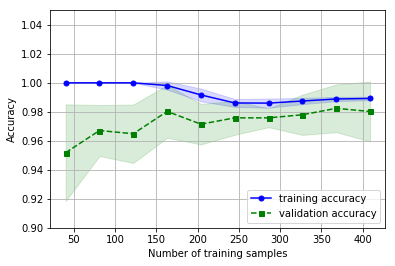

In [64]:
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9,1.05])
plt.show()

In [69]:
from sklearn.model_selection import validation_curve
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_scores,test_scores=validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',
                                          param_range=param_range,cv=10)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [73]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

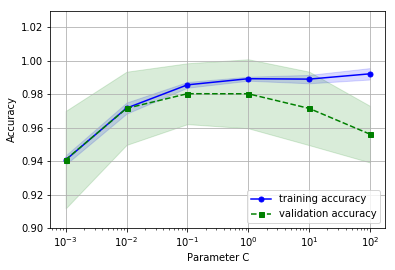

In [77]:
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.9,1.03])
plt.show()

In [79]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc=make_pipeline(StandardScaler(),SVC(random_state=1))
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid=[{'svc__C':param_range,'svc__kernel':['linear']},
            {'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=4)

In [80]:
gs=gs.fit(X_train,y_train)

In [81]:
print(gs.best_score_)

0.9846153846153847


In [82]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [83]:
clf=gs.best_estimator_
clf.fit(X_train,y_train)
print('Test accuracy:%.3f' % clf.score(X_test,y_test))

Test accuracy:0.974


In [84]:
# nested cross-validation:
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=2)
scores=cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy:0.974 +/- 0.015


In [85]:
from sklearn.tree import DecisionTreeClassifier
gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                scoring='accuracy',cv=2)
scores=cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy:0.934 +/- 0.016


In [88]:
# confusion matrix
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred=pipe_svc.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


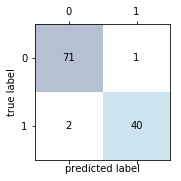

In [89]:
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [90]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score

In [91]:
print('Precision:%.3f' % precision_score(y_true=y_test,y_pred=y_pred))

Precision:0.976


In [92]:
print('Recall:%.3f' % recall_score(y_true=y_test,y_pred=y_pred))

Recall:0.952


In [94]:
print('F1:%.3f' % f1_score(y_true=y_test,y_pred=y_pred))

F1:0.964


In [95]:
from sklearn.metrics import make_scorer,f1_score
scorer=make_scorer(f1_score,pos_label=0)
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
gs=gs.fit(X_train,y_train)
print(gs.best_score_)

0.9880219137963148


In [96]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [101]:
# plot an ROC curve
from sklearn.metrics import roc_curve,auc
from scipy import interp
pipe_lr=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(penalty='l2',random_state=1,C=100.0))
X_train2=X_train[:,[4,14]]

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


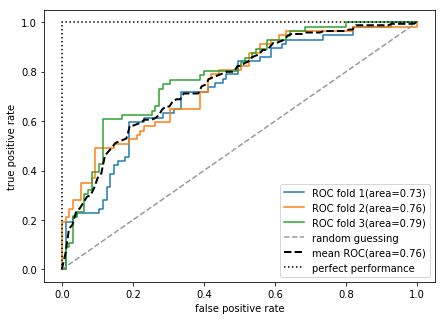

In [104]:
cv=list(StratifiedKFold(n_splits=3,random_state=1).split(X_train,y_train))
fig=plt.figure(figsize=(7,5))

mean_tpr=0.0
mean_fpr=np.linspace(0,1,100)
all_tpr=[]

for i,(train,test) in enumerate(cv):
    probas=pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,thresholds=roc_curve(y_train[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0]=0.0
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC fold %d(area=%0.2f)' % (i+1,roc_auc))
plt.plot([0,1],[0,1],linestyle='--',color=(0.6,0.6,0.6),label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc=auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,'k--',label='mean ROC(area=%0.2f)' % mean_auc,lw=2)
plt.plot([0,0,1],[0,1,1],linestyle=':',color='black',label='perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [112]:
# dealing with class imbalance
X_imb=np.vstack((X[y==0],X[y==1][:40]))
y_imb=np.hstack((y[y==0],y[y==1][:40]))

y_pred=np.zeros(y_imb.shape[0])
np.mean(y_pred==y_imb) * 100

89.92443324937027

In [113]:
from sklearn.utils import resample
print('Number of class 1 samples before:',X_imb[y_imb==1].shape[0])

Number of class 1 samples before: 40


In [114]:
X_upsampled,y_upsampled=resample(X_imb[y_imb==1],y_imb[y_imb==1],replace=True,
                                 n_samples=X_imb[y_imb==0].shape[0],random_state=123)
print('Number of class 1 samples after:',X_upsampled.shape[0])

Number of class 1 samples after: 357


In [115]:
X_bal=np.vstack((X[y==0],X_upsampled))
y_bal=np.hstack((y[y==0],y_upsampled))

In [116]:
y_pred=np.zeros(y_bal.shape[0])
np.mean(y_pred==y_bal)*100

50.0